In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt 
from scipy.optimize import curve_fit

datos = pd.read_csv("datos_punto2.csv")

datos

,t(s),x(cm),sigmax(cm)
0,6.5,3.2,1.2
1,9.3,9.7,2.1
2,14.6,11.3,3.6


---
## 2.1

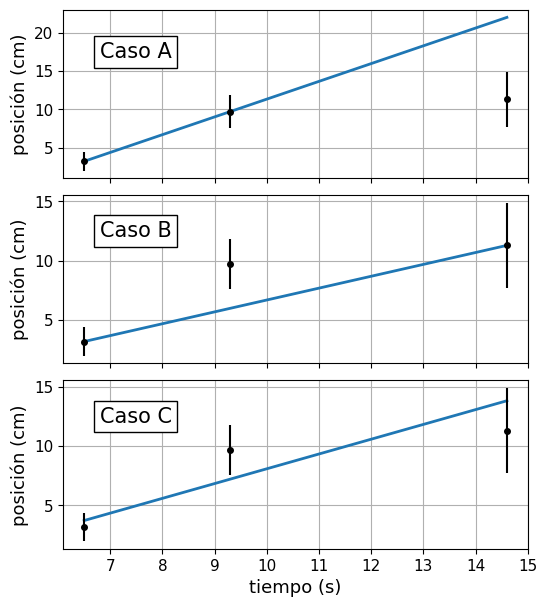

In [2]:
## Plot the points in the graphs
def plot_points(index, xdata, ydata, yerror):
    axis[index].errorbar(xdata,ydata, yerr=yerror, fmt=".", color="black", markersize=8)

## Linear function to fit 
def func_linear(x, m, b):
    return (m*x + b)
    
## Given m,b,xdata, find the corresponding yvalues for a line
def reg_values(m,b,xdata):
    ydata = []
    for ii in range (len(xdata)):
        ydata.append(m*xdata[ii] + b)
    return ydata
    

## Given 2 (x,y) points, finds m and b of the line that connects these points
def find_mb(x1, x2, y1, y2):
    m = (y2-y1)/(x2-x1)
    b = -m*x1 + y1
    return m,b 


## Given m,b and plt.axis, plots the function     
def plot_line(obj, m, b):
    XX = np.linspace(xmin, xmax, 2)
    YY = []
    for ii in range (2):
        YY.append(m*XX[ii] + b)
    obj.plot(XX, YY,linewidth=2)
    
        
xmin = datos["t(s)"][0]    
xmax = datos["t(s)"][2]

m1, b1 = find_mb(datos["t(s)"][0], datos["t(s)"][1], datos["x(cm)"][0], datos["x(cm)"][1])
m2, b2 = find_mb(datos["t(s)"][0], datos["t(s)"][2], datos["x(cm)"][0], datos["x(cm)"][2])
popt_xi1, pcov_xi1 = curve_fit(func_linear, datos["t(s)"], datos["x(cm)"], sigma=datos["sigmax(cm)"])
mxi1, bxi1 = popt_xi1



# Used for finding xi2 of each regression
y1data = reg_values(m1, b1, datos["t(s)"])
y2data = reg_values(m2, b2, datos["t(s)"])
y3data = reg_values(mxi1, bxi1, datos["t(s)"])


fig = plt.figure(figsize=(6,7))
gs = fig.add_gridspec(3, hspace=0.1) #Sin espacio entre las gráficas
axis = gs.subplots(sharex=True, sharey=False)
#fig.suptitle("uwu")
plot_line(axis[0], m1, b1)
plot_line(axis[1], m2, b2)
plot_line(axis[2], mxi1, bxi1)
for ii in range (len(axis)):
    plot_points(ii, datos["t(s)"], datos["x(cm)"], datos["sigmax(cm)"])
    axis[ii].tick_params(axis="both", labelsize=11)
    axis[ii].set_ylabel("posición (cm)", size=13)
    #axis[ii].legend()
    #axis[ii].label_outer() #Quita los ticks de las gráficas no fronteras
    #axis[ii].minorticks_on()
    axis[ii].grid(which="both")
    axis[ii].set_axisbelow(True)

    
axis[0].text(6.8,16.7, "Caso A",fontsize=15, bbox=dict(facecolor='white', alpha=1.0))
axis[1].text(6.8,12, "Caso B",fontsize=15, bbox=dict(facecolor='white', alpha=1.0))
axis[2].text(6.8,12, "Caso C",fontsize=15, bbox=dict(facecolor='white', alpha=1.0))
    
plt.xlabel("tiempo (s)", fontsize=13)
plt.savefig("chi_original.pdf")
plt.show()

---
## 2.2

In [3]:
def find_xi(xdata, ydata, yerror, f):
    suma = 0
    for ii in range (len(xdata)):
        suma += ((ydata[ii] - f[ii])/yerror[ii])**2
    return suma

xi1 = find_xi(datos["t(s)"], datos["x(cm)"], datos["sigmax(cm)"], y1data)
xi2 = find_xi(datos["t(s)"], datos["x(cm)"], datos["sigmax(cm)"], y2data)
xixi1 = find_xi(datos["t(s)"], datos["x(cm)"], datos["sigmax(cm)"], y3data)

## DataFrame con los valores de las regresiones
df_regval = pd.DataFrame(columns=['regresion','a0', 'a1', 'chi'])
df_regval.loc[0] = ["A", b1, m1, xi1]
df_regval.loc[1] = ["B", b2, m2, xi2]
df_regval.loc[2] = ["C", bxi1, mxi1, xixi1]
df_regval

,regresion,a0,a1,chi
0,A,-11.889286,2.321429,8.840003
1,B,-3.300000,1.000000,3.104308
2,C,-4.367339,1.245777,2.082079


---
## 2.4

In [4]:
datos["sigmax(cm)"][2] = 30
datos

,t(s),x(cm),sigmax(cm)
0,6.5,3.2,1.2
1,9.3,9.7,2.1
2,14.6,11.3,30.0


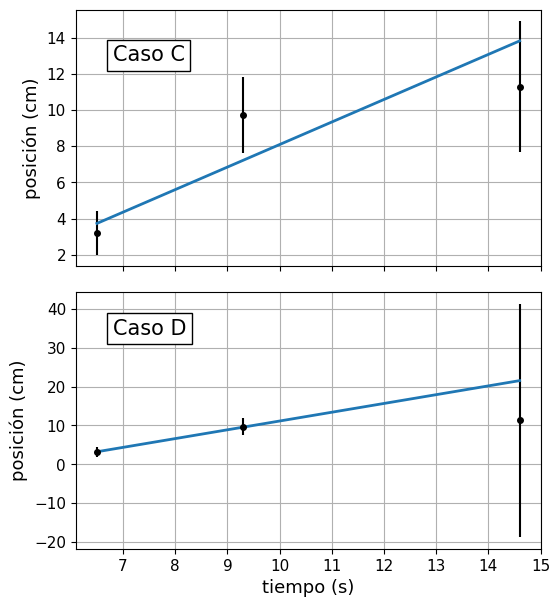

In [5]:
popt_xi2, pcov_xi2 = curve_fit(func_linear, datos["t(s)"], datos["x(cm)"], sigma=datos["sigmax(cm)"])
mxi2, bxi2 = popt_xi2

y4data = reg_values(mxi2, bxi2, datos["t(s)"])


fig = plt.figure(figsize=(6,7))
gs = fig.add_gridspec(2, hspace=0.1) #Sin espacio entre las gráficas
axis = gs.subplots(sharex=True, sharey=False)
#fig.suptitle("uwu")

for ii in range (len(axis)):
    if ii == 0:
        datos["sigmax(cm)"][2] = 3.6
    if ii == 1:
        datos["sigmax(cm)"][2] = 30
    plot_points(ii, datos["t(s)"], datos["x(cm)"], datos["sigmax(cm)"])
    axis[ii].tick_params(axis="both", labelsize=11)
    axis[ii].set_ylabel("posición (cm)", size=13)
    #axis[ii].legend()
    #axis[ii].label_outer() #Quita los ticks de las gráficas no fronteras
    #axis[ii].minorticks_on()
    axis[ii].grid(which="both")
    axis[ii].set_axisbelow(True)

    

axis[0].text(6.8,12.7, "Caso C",fontsize=15, bbox=dict(facecolor='white', alpha=1.0))
axis[1].text(6.8,33.3, "Caso D",fontsize=15, bbox=dict(facecolor='white', alpha=1.0))    
    

popt_xi2, pcov_xi2 = curve_fit(func_linear, datos["t(s)"], datos["x(cm)"], sigma=datos["sigmax(cm)"])
mxi2, bxi2 = popt_xi2

plot_line(axis[0], mxi1, bxi1)
plot_line(axis[1], mxi2, bxi2)

plt.xlabel("tiempo (s)", fontsize=13)
plt.savefig("chi_modified.pdf")
plt.show()

In [6]:
xixi2 = find_xi(datos["t(s)"], datos["x(cm)"], datos["sigmax(cm)"], y4data)
df_regval.loc[3] = ["D", bxi2, mxi2, xixi2]
df_regval

,regresion,a0,a1,chi
0,A,-11.889286,2.321429,8.840003
1,B,-3.300000,1.000000,3.104308
2,C,-4.367339,1.245777,2.082079
3,D,-11.449937,2.258601,0.121612
